In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Naive Bayes implementation practise
## First some feature engineering

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/machinelearning-Lab4/Lab4/NaiveBayes/Example1/adult.csv'
df = pd.read_csv(url)

In [3]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
df_adult = df.drop(['workclass','fnlwgt','educational-num','marital-status','race','capital-gain','capital-loss',
               'native-country'],axis=1)

In [5]:
df_adult.head(3)

,age,education,occupation,relationship,gender,hours-per-week,income
0,25,11th,Machine-op-inspct,Own-child,Male,40,<=50K
1,38,HS-grad,Farming-fishing,Husband,Male,50,<=50K
2,28,Assoc-acdm,Protective-serv,Husband,Male,40,>50K


In [6]:
df_adult.drop(['education','occupation','relationship'],axis=1,inplace=True)
df_adult.head(3)

,age,gender,hours-per-week,income
0,25,Male,40,<=50K
1,38,Male,50,<=50K
2,28,Male,40,>50K


In [7]:
input = df_adult.drop(['income'],axis='columns')
input.head()

,age,gender,hours-per-week
0,25,Male,40
1,38,Male,50
2,28,Male,40
3,44,Male,40
4,18,Female,30


In [8]:
genders = pd.get_dummies(df_adult.gender) #Gjør genders colonnen om til tall

In [19]:
genders.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [21]:
len(genders)

48842

In [23]:
len(df.gender)

48842

In [10]:
target = df['income']
target.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [11]:
input.drop(['gender'],axis='columns', inplace = True)

In [12]:
input.head(3)

,age,hours-per-week
0,25,40
1,38,50
2,28,40


## Naive Bayes
### Spliting dataset as into training and testing data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(input,target, test_size=0.20)

In [14]:
len(Y_train)

39073

In [17]:
len(Y_test)

9769

## Training and prediction

In [28]:
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB().fit(X_train, Y_train)  
Y_pred = model.predict(X_test)

In [29]:
Y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [30]:
print(accuracy_score(Y_pred,Y_test))

0.7638448152318559


In [40]:
X_train.head(3)

,age,hours-per-week
33799,47,40
10212,23,40
45849,27,50


In [45]:
Y_train.head(3)

33799     >50K
10212    <=50K
45849    <=50K
Name: income, dtype: object

In [52]:
Y_test[:10]

10766    <=50K
24746    <=50K
14931    <=50K
36167    <=50K
35447     >50K
28923    <=50K
38610     >50K
39726    <=50K
24419    <=50K
40890    <=50K
Name: income, dtype: object

In [53]:
target.iloc[10766]

'<=50K'

In [62]:
len(model.predict(X_test))

9769

In [63]:
model.predict(X_test)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [68]:
X_test[:10]

,age,hours-per-week
10766,29,32
24746,38,40
14931,19,35
36167,31,40
35447,41,45
28923,30,40
38610,56,40
39726,22,35
24419,52,40
40890,32,40


## Lager en modell med kjønn

In [66]:
Xgender_train, Xgender_test, Ygender_train, Y_gendertest = train_test_split(genders,target, test_size=0.20)

In [67]:
model_gender = MultinomialNB().fit(Xgender_train, Ygender_train)  
Y_pred_gender = model_gender.predict(Xgender_test)

In [69]:
Y_pred_gender

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [89]:
accuracy_score(Y_pred_gender,Y_gendertest)

0.7569863855051694

In [91]:
model.predict(Xgender_test)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

### Visualiserer modellen

In [92]:
import matplotlib.pyplot as plt

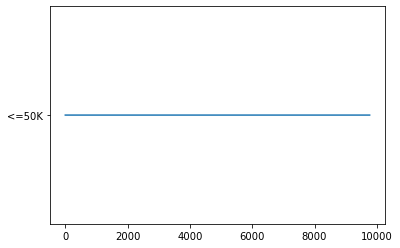

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Y_pred_gender)